In [1]:
import torch
import numpy as np

/home/mark/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from IPython.display import Image

## Here are the choices of inputs  
It's a bit sloppy as you have to select the one you want to run "by hand"

In [3]:
X_np = np.array([0,0])  ## we'll run this one first, and not run the others below

In [ ]:
X_np = np.array([1,0])

In [ ]:
X_np = np.array([0,1])

In [ ]:
X_np = np.array([1,1])

## Description of MLP

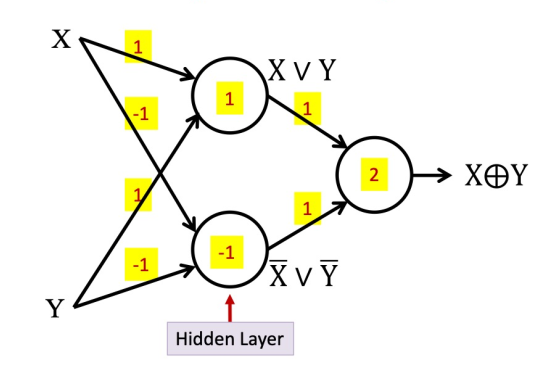

In [4]:
Image("MLP.png")

## Set the weights and bias

In [5]:
W_np = np.array([1,-1,1,-1]).reshape(2,2).T

In [6]:
b_np = np.array([0.0])

In [7]:
X = torch.from_numpy(X_np).type(torch.float32)
W = torch.from_numpy(W_np).type(torch.float32)

In [8]:
b = torch.from_numpy(b_np).type(torch.float32)

## Here are the activation functions

In [9]:
actf1 = lambda i: i >= 1
actf2 = lambda i: i >= -1
actf3 = lambda i: i >= 2

## Use PyTorch to do the work

In [10]:
model = torch.nn.Linear(in_features=2, out_features=2)

In [11]:
model.weight

Parameter containing:
tensor([[-0.1832,  0.2280],
        [ 0.1133, -0.4599]], requires_grad=True)

In [12]:
model.bias

Parameter containing:
tensor([-0.6659, -0.1805], requires_grad=True)

In [13]:
model.weight.data = W

In [14]:
model.weight

Parameter containing:
tensor([[ 1.,  1.],
        [-1., -1.]], requires_grad=True)

In [15]:
model.bias.data = b

In [16]:
model.bias

Parameter containing:
tensor([0.], requires_grad=True)

## Make sure arrays have the correct dimentions

In [14]:
X_np @ W_np

array([0, 0])

## Let's look at the input again

In [17]:
X

tensor([0., 0.])

In [18]:
hl_in = model(X)
hl_in

tensor([0., 0.], grad_fn=<AddBackward0>)

## apply activation functions inside the hidden layer

In [19]:
hl_1 = actf1(hl_in)[0]

In [20]:
hl_2 = actf2(hl_in)[1]

In [21]:
hl_out = torch.hstack([hl_1.type(torch.float32), hl_2.type(torch.float32), ])

In [22]:
hl_out

tensor([0., 1.])

In [23]:
hl_out.shape

torch.Size([2])

In [24]:
hl_out = hl_out.view(1, 2)

## now we have to do it again inside the hidden layer, but with one out_feature

In [25]:
model_hl = torch.nn.Linear(in_features=2, out_features=1)

## we have different weights

In [26]:
model_hl.weight.data = torch.tensor([1, 1]).type(torch.float32).view(1,2)

In [27]:
model_hl.bias.data = torch.tensor([0]).type(torch.float32)

In [28]:
out = model_hl(hl_out)
out

tensor([[1.]], grad_fn=<AddmmBackward0>)

## apply the final activation function

In [29]:
actf3(out).type(torch.float32)

tensor([[0.]])